In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Diet.csv')
data.head()

,Person,gender,Age,Height,pre_weight,Diet,weight_6weeks
0,1,F,22,159,58,1,54.2
1,2,F,46,192,60,1,54.0
2,3,F,55,170,64,1,63.3
3,4,F,33,171,64,1,61.1
4,5,F,50,170,65,1,62.2


In [3]:
data.isnull().sum()

Person           0
gender           0
Age              0
Height           0
pre_weight       0
Diet             0
weight_6weeks    0
dtype: int64

In [4]:
data=pd.DataFrame(data)
data.head()

,Person,gender,Age,Height,pre_weight,Diet,weight_6weeks
0,1,F,22,159,58,1,54.2
1,2,F,46,192,60,1,54.0
2,3,F,55,170,64,1,63.3
3,4,F,33,171,64,1,61.1
4,5,F,50,170,65,1,62.2


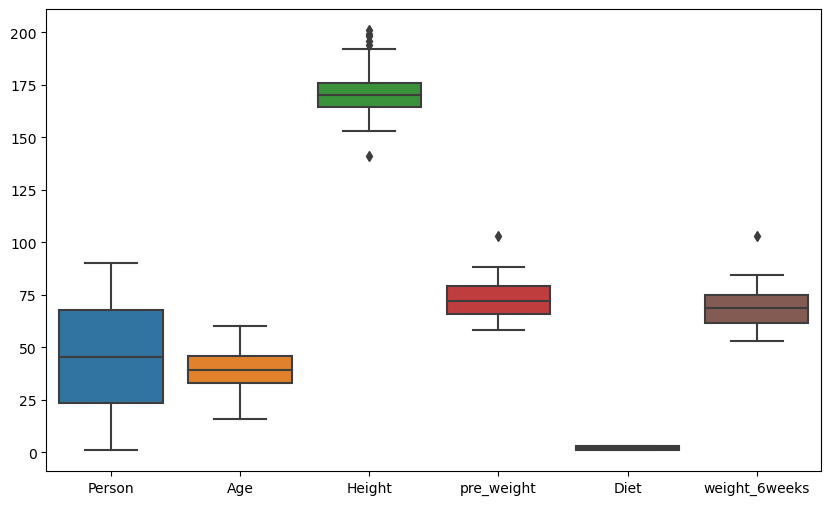

In [5]:
plt.figure(figsize=(10, 6))       # checking outliers using boxplot
sns.boxplot(data)
plt.show()

In [6]:
data['Bmi_start']=data['pre_weight'] / (data['Height'] / 100)**2
data['Bmi_end']=data['weight_6weeks'] / (data['Height'] / 100)**2
data['Bmi_change']=data['Bmi_start'] - data['Bmi_end']
data.head()

,Person,gender,Age,Height,pre_weight,Diet,weight_6weeks,Bmi_start,Bmi_end,Bmi_change
0,1,F,22,159,58,1,54.2,22.942130,21.439025,1.503105
1,2,F,46,192,60,1,54.0,16.276042,14.648438,1.627604
2,3,F,55,170,64,1,63.3,22.145329,21.903114,0.242215
3,4,F,33,171,64,1,61.1,21.887076,20.895318,0.991758
4,5,F,50,170,65,1,62.2,22.491349,21.522491,0.968858


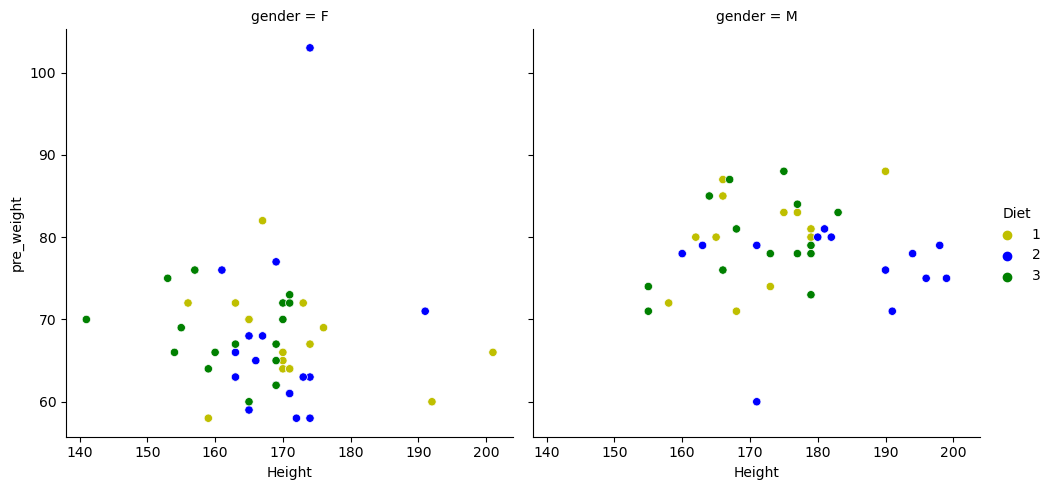

In [55]:
sns.relplot(data, x='Height' , y='pre_weight', hue='Diet',col ='gender', palette=['y','b','g'])

In [8]:
# converting Bmi_change to list
diet_1 = data[data['Diet']==1]['Bmi_change'].tolist()
diet_2 = data[data['Diet']==2]['Bmi_change'].tolist()
diet_3 = data[data['Diet']==3]['Bmi_change'].tolist()

In [50]:
GM = data.Bmi_change.mean()    # Grand mean
GM

1.3413400888102003

In [40]:
diet=[diet_1, diet_2, diet_3]      # calculating sum of square Total
ss_total = 0
for i in range(0, len(diet)):
    for j in range(len(diet[i])):
        ss_total+= ((diet[i][j] - GM) **2)
print('ss_total =',ss_total)

ss_total = 70.29681852815399


In [42]:
def ssw(data):
    mean = sum(data) / len(data)
    ssw = 0
    for i in range(len(data)):
        ssw += ((data[i] - mean)**2)
    return ssw

In [43]:
ssw_1 = ssw(diet_1)
ssw_2 = ssw(diet_2)
ssw_3 = ssw(diet_3)

In [48]:
ss_within = ssw_1 + ssw_2 + ssw_3 
ss_within        # sum of square within

55.60724318088374

In [49]:
ss_bw = ss_total - ss_within    
ss_bw        # sum of square between

14.68957534727025

In [56]:
df_bw = 3 - 1           # Ncols -1
df_within = 90 -3       # Count - Ncols

In [57]:
# calculating f- statistics
f = (ss_bw / df_bw) / (ss_within / df_within)
f

11.491246302710534

In [61]:
# calculating p-value
import scipy.stats as stats
p_value = stats.f.sf(f, df_bw, df_within)
p_value

3.728315951810458e-05

from this we can understand that
we successfully rejeect the Null Hypothesis.
Since p_value is less the alpha i.e 0.05.